# Visualize scores

## Between splits
no-heg/with-heg vs no-control/with-control

,dataset,splits,no_special > with_special,p < 0.05,pvalue,statistic
0,elsherief2021,hegsplits,False,False,0.283346,1.140936
1,elsherief2021,controlsplits,True,False,0.739327,-0.343202
2,kennedy2020,hegsplits,True,False,0.641993,-0.481002
3,kennedy2020,controlsplits,True,True,0.035891,-2.464530
4,salminen2018,hegsplits,True,False,0.378258,-0.926710
5,salminen2018,controlsplits,False,True,0.037921,2.430983


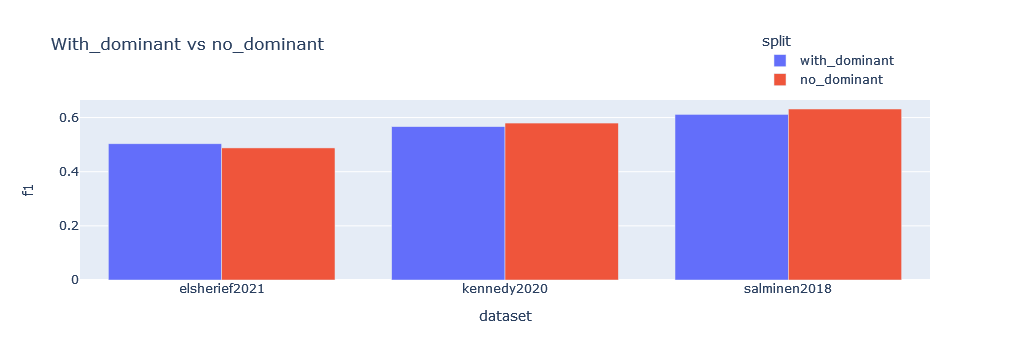

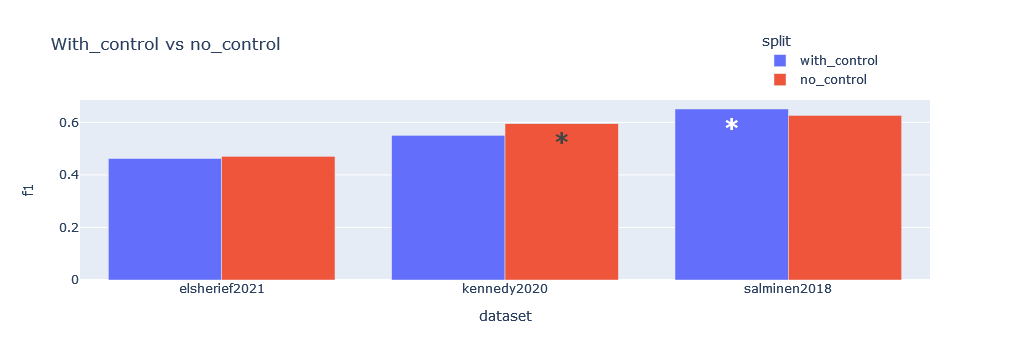

In [7]:
import pandas as pd
import plotly.express as px
from IPython.display import display
import pdb

clf_name = 'bert'
cv_runs = 5

titles = {'hegsplits': 'With_dominant vs no_dominant',
          'controlsplits': 'With_control vs no_control'}

name = f'/usr0/home/mamille3/hegemonic_hate/output/{clf_name}_{cv_runs}x2cv'

# Load scores
scores_path = f'{name}_f1.csv'
all_f1s = pd.read_csv(scores_path, index_col=0)
if 'dataset' not in all_f1s.columns:
    all_f1s.reset_index(inplace=True)
# display(f1s)

# Load significance
sigs_path = f'{name}_sigs.csv'
all_sigs = pd.read_csv(sigs_path, index_col=0)
if all_sigs.index.name == 'dataset':
    all_sigs.reset_index(inplace=True)
display(all_sigs)
    
for splits in ['hegsplits', 'controlsplits']:
# for splits in ['hegsplits']:

    f1s = all_f1s.query('splits == @splits')
    sigs = all_sigs.query('splits == @splits')
    
    # Add significant difference markers
    f1s = pd.merge(f1s, sigs, on=['dataset', 'splits'])
    f1s['sig'] = [(split, better, sig) in [('no_special', True, True), ('with_special', False, True)] for (split, better, sig) in zip(
        f1s['split'], f1s['no_special > with_special'], f1s['p < 0.05'])]
    f1s['sig*'] = f1s.sig.map(lambda x: '<b>*</b>' if x else '')
    # display(f1s)

    # Plot
    if splits == 'hegsplits':
        f1s = f1s.replace('with_special', 'with_dominant').replace('no_special', 'no_dominant')
    elif splits == 'controlsplits':
        f1s = f1s.replace('with_special', 'with_control').replace('no_special', 'no_control')
    fig = px.bar(f1s, x='dataset', y='f1', color='split', barmode='group', title=titles[splits], text='sig*')
    fig.update_layout(legend=dict(
        yanchor='top',
        y=1.4,
        xanchor='left',
        x=0.8
    ))
    fig.update_traces(textfont_size=24)
    fig.show()

## Between classifiers

In [9]:
import pandas as pd
import plotly.express as px
from IPython.display import display

# clfs = [('bert', 2), ('lr', 5)] # (clf_name, cv_runs)
clfs = [('bert', 5), ('lr', 5), ('rf_lab', 1)] # (clf_name, cv_runs)

titles = {'hegsplits': 'With_dominant vs no_dominant',
          'controlsplits': 'With_control vs no_control'}
scores_dict = {}
# for splits in ['hegsplits', 'controlsplits']:
for clf_name, cv_runs in clfs:
    for splits in ['hegsplits']:

        if clf_name == 'bert':
            name = f'/usr0/home/mamille3/hegemonic_hate/output/{clf_name}_{cv_runs}x2cv'
        else:
            name = f'/usr0/home/mamille3/hegemonic_hate/output/{clf_name}_{splits}_{cv_runs}x2cv'

        # Load scores
        scores_path = f'{name}_f1.csv'
        f1s = pd.read_csv(scores_path, index_col=0)
        if splits == 'hegsplits':
            if 'splits' in f1s.columns:
                f1s = f1s.query('splits == @splits')
            f1s = f1s.replace('with_special', 'with_dominant').replace('no_special', 'no_dominant')
        elif splits == 'controlsplits':
            f1s = f1s.replace('with_special', 'with_control').replace('no_special', 'no_control')
        f1s['clf'] = clf_name
        scores_dict[(clf_name, cv_runs)] = f1s

scores = pd.concat(scores_dict.values())
scores

FileNotFoundError: [Errno 2] No such file or directory: '/usr0/home/mamille3/hegemonic_hate/output/rf_lab_hegsplits_1x2cv_f1.csv'

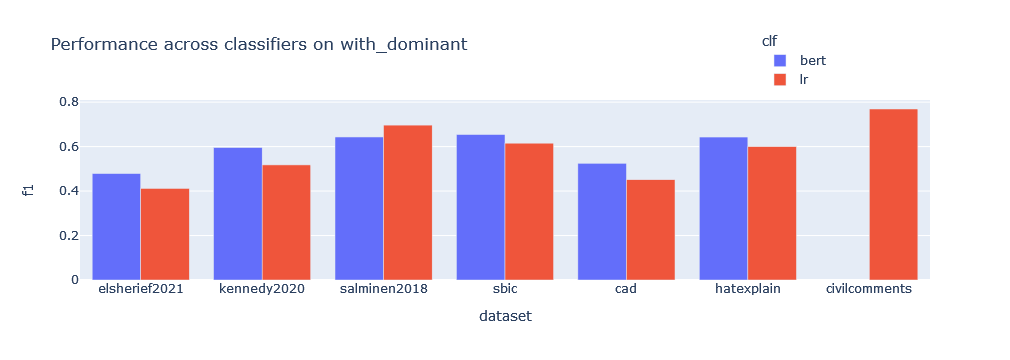

In [9]:
# Plot
selection = 'with_dominant'
fig = px.bar(scores.query('split == @selection'), x='dataset', y='f1', color='clf', barmode='group', 
             title=f'Performance across classifiers on {selection}')
fig.update_layout(legend=dict(
    yanchor='top',
    y=1.4,
    xanchor='left',
    x=0.8
))
fig.show()